In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)
print(sns.__version__)

1.4.4
0.11.2


In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
import squarify

In [4]:
df = pd.read_csv('data/car.csv').dropna().reset_index(drop=True)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
8080,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
8081,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
8082,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


# 1. Số lượng xe được bán theo từng hãng

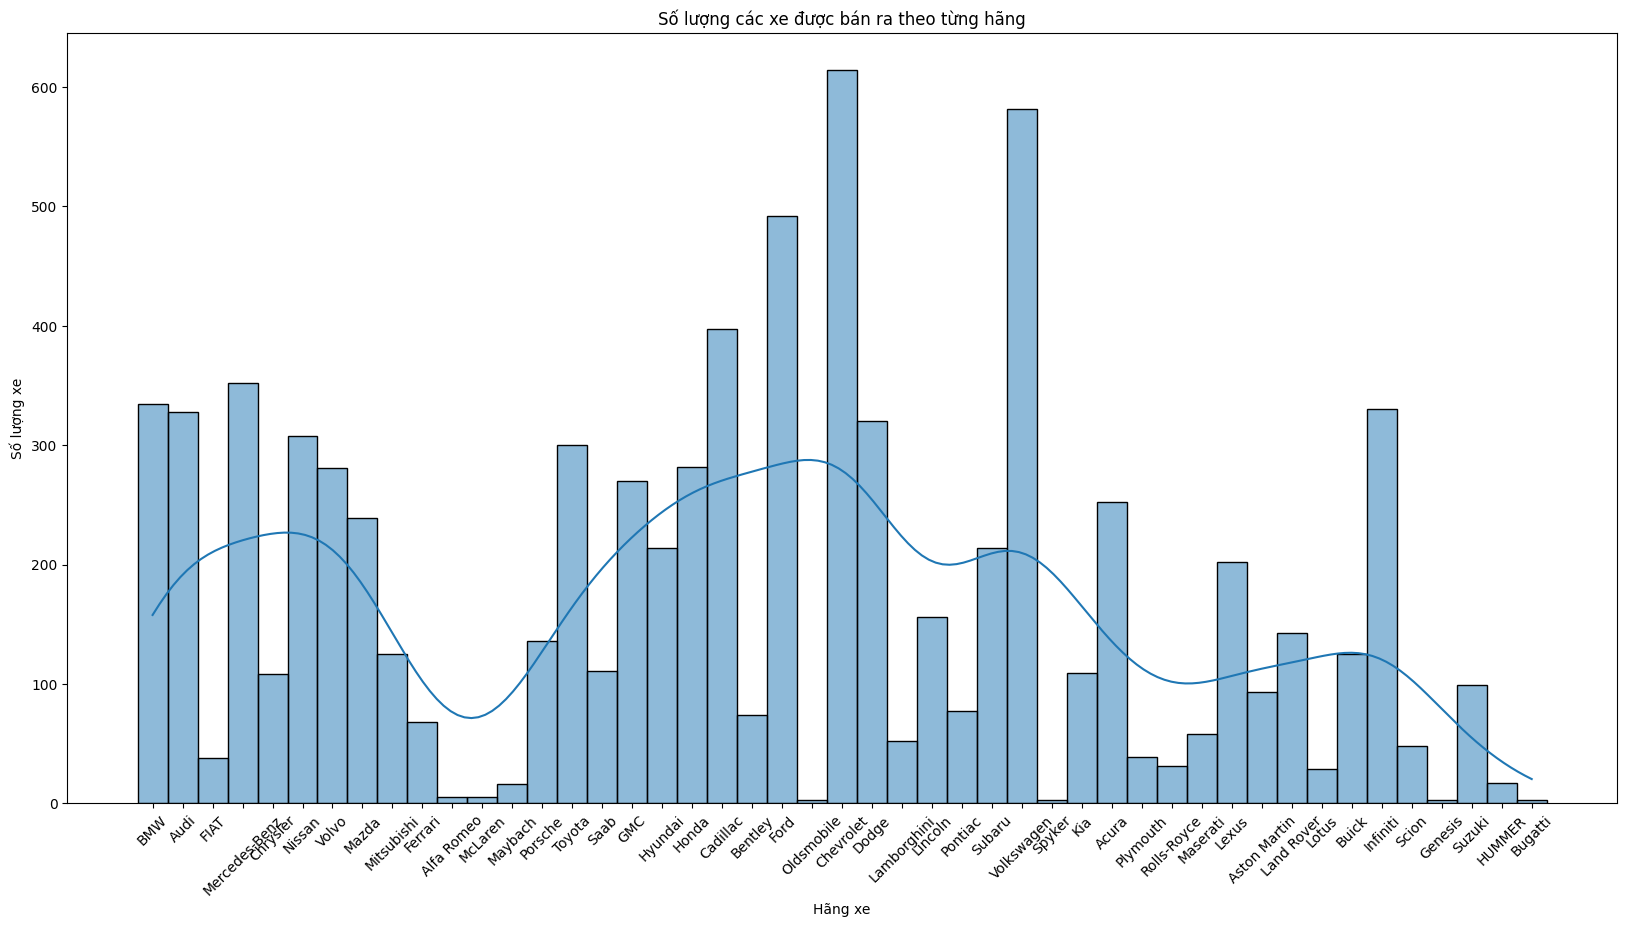

In [14]:
fig = plt.figure(figsize=(20, 10))
plt.title('Số lượng các xe được bán ra theo từng hãng')
bieudo1 = sns.histplot(data = df, x = 'Make', kde = True)
plt.xticks(rotation = 45)
bieudo1.set_xlabel('Hãng xe')
bieudo1.set_ylabel('Số lượng xe')
plt.savefig('barchart.png')
plt.show()


In [6]:
# Top 10 hãng xe bán chạy nhất
top_10_brands = df['Make'].unique()[0:10]
top_10_brands

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari'], dtype=object)

In [7]:
values = df['Make'].value_counts()[0:10].keys().tolist()
counts = df['Make'].value_counts()[0:10]
other_counts = df['Make'].value_counts()[10:].sum()

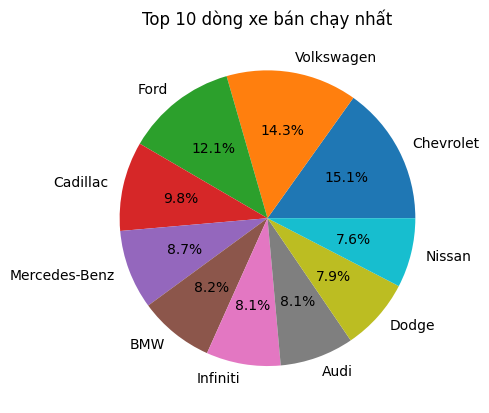

In [26]:
plt.pie(counts, labels = values, autopct='%1.1f%%')
plt.title('Top 10 dòng xe bán chạy nhất')
plt.savefig('piechart.png')
plt.show()


# 2. So sánh về độ phổ biến theo từng size xe


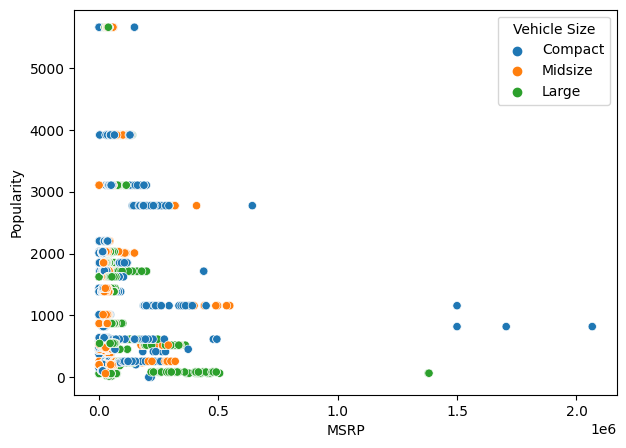

In [16]:
fig = plt.figure(figsize = (7,5))
bieudo2 = sns.scatterplot(data = df, x = 'MSRP', y='Popularity', hue = 'Vehicle Size')
plt.savefig('scatterplot1.png')
plt.show()

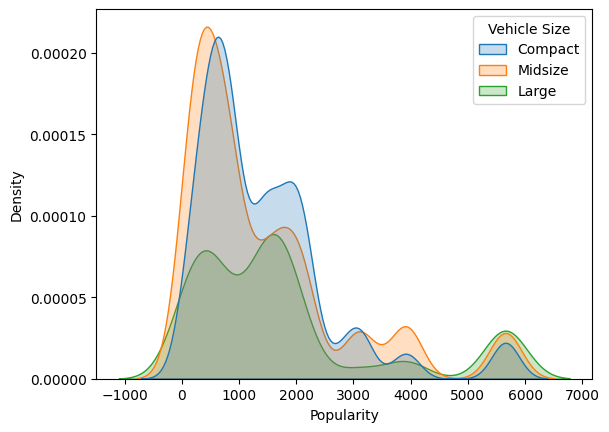

In [17]:
sns.kdeplot(data = df, x = 'Popularity', hue = 'Vehicle Size', shade = True)
plt.savefig('kdeplot.png')
plt.show()

# 3. Mối tương quan giữa xi lanh và mã lực theo từng loại xe

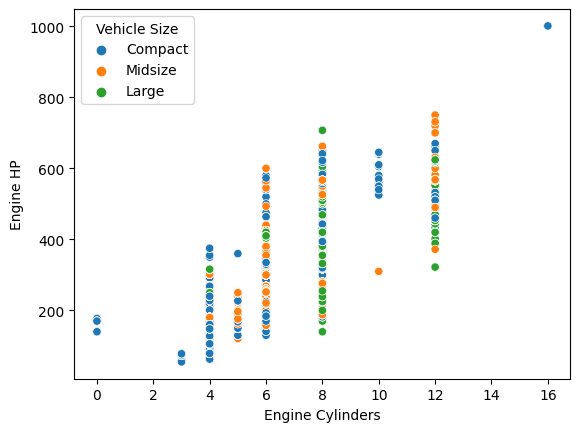

In [18]:
bieudo3 = sns.scatterplot(data = df, x = 'Engine Cylinders', y = 'Engine HP', hue = 'Vehicle Size' )
plt.savefig('scatter2.png')
plt.show()

# 4. Mối tương quan giữa 2 chế độ lái

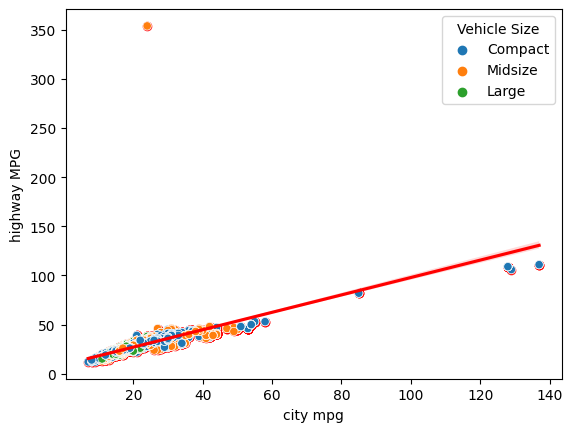

In [19]:
sns.regplot(data = df, x='city mpg', y='highway MPG', color = 'red', ci = 95)
sns.scatterplot(data = df, x='city mpg', y='highway MPG', hue = 'Vehicle Size' )
plt.savefig('scatter3.png')
plt.show()